In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feature_engine as fe
import category_encoders as ce
import seaborn as sns


# Load Dataset

In [95]:
data = pd.read_excel('./ds/ds.xlsx', sheet_name='Dataset')
col_to_remove = ['Ptid', ]
data = data.drop(col_to_remove, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Ntm_Specialist_Flag     

In [96]:
obejct_cols = data.select_dtypes(include='object').columns[1:]
int_cols = data.select_dtypes(include='int64').columns

# Describing Data

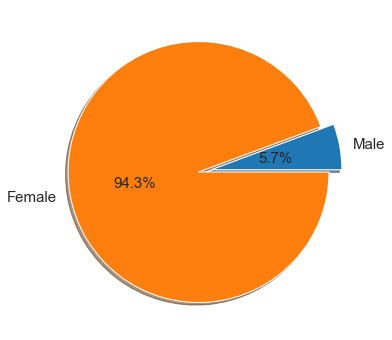

In [97]:
plt.rcParams['font.size'] =15
plt.figure(figsize=(6, 6))
labels = data['Gender'].unique()
gender=data['Gender'].value_counts(ascending=True)
explode = (0, 0.1)
plt.pie(x=gender, autopct="%.1f%%", labels=labels,explode=explode, pctdistance=0.5,shadow=True)
plt.show()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64


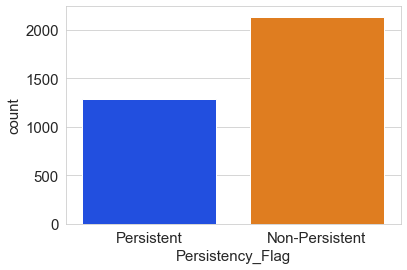

In [98]:
# checking the Persistency status counts of the patients 
sns.set_style("whitegrid")
persistency_count= data['Persistency_Flag'].value_counts() 
sns.countplot(x="Persistency_Flag",data = data,palette="bright")
print(persistency_count)


Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64


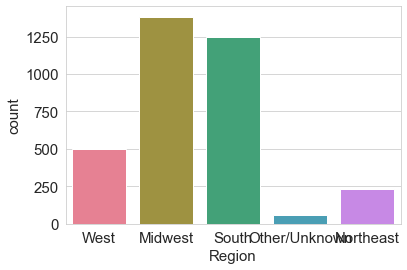

In [99]:
# checking the region of the patients 
region_count= data.Region.value_counts() 
sns.countplot(x="Region",data=data,palette="husl") 
print(region_count)

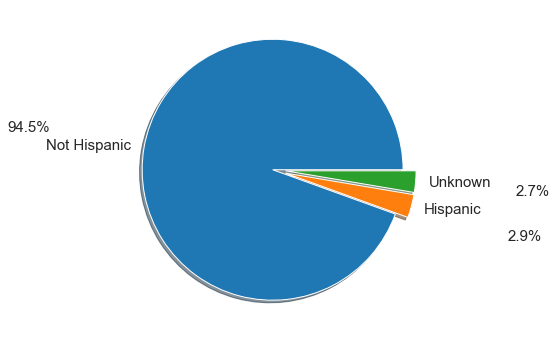

In [100]:
# checking the Ethnicity of the patients
plt.rcParams['font.size'] =15
plt.figure(figsize=(6, 6))
labels = data['Ethnicity'].unique()
ethnicity = data['Ethnicity'].value_counts(ascending=False)
explode = (0, 0.1, 0.1) 
plt.pie(x=ethnicity, autopct="%.1f%%",explode=explode, labels=labels, pctdistance=1.9, shadow=True)
plt.show()

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64


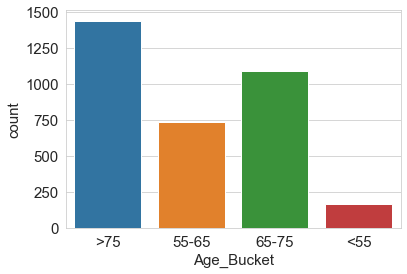

In [101]:
# checking the Age range of the patients in the study
age_count = data.Age_Bucket.value_counts() 
sns.countplot(x="Age_Bucket",data=data)
print(age_count)

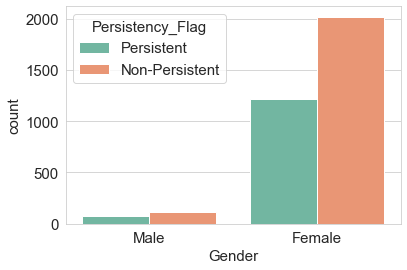

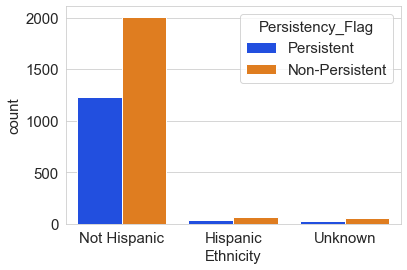

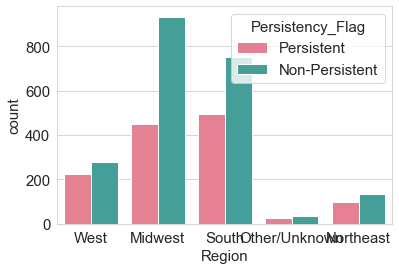

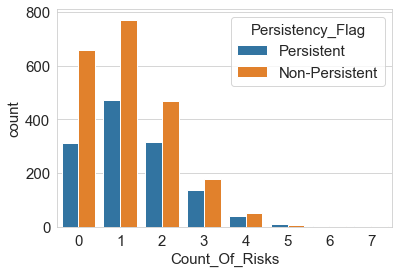

In [102]:
# checking the gender of the patients per Persistency status 
sns.countplot(x="Gender", hue="Persistency_Flag", data=data, palette="Set2")
plt.show()
# checking the Ethnicity of the patients per Persistency status 
sns.countplot(x="Ethnicity", hue="Persistency_Flag", data=data, palette="bright")
plt.show()
# checking the Region of the patients per Persistency status 
# figure(figsize=(10, 10))
sns.countplot(x="Region", hue="Persistency_Flag", data=data, palette="husl")
plt.show()
# checking the Region of the patients per Persistency status
sns.countplot(x="Count_Of_Risks", hue="Persistency_Flag", data=data)
plt.show()


# Handling Unknown values for Race, Region, and Ethnicity Variables...

In [103]:
# Apply changes on copy of data
data1 = data.copy()

In [104]:
data['Race'].value_counts()

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

In [105]:
# Replace "Other/Unknown" values by Mode, that is Caucasian
data1['Race'] = np.where((data['Race'].isin(['Other/Unknown'])), 'Caucasian', data['Race'])
data1['Race'].value_counts()

Caucasian           3245
African American      95
Asian                 84
Name: Race, dtype: int64

In [106]:
data['Region'].value_counts()

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

In [107]:
data['Ethnicity'].value_counts()

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

In [108]:
print(" What Ethincity are people with Region Unknown? \n")
print(data.iloc[np.where((data['Region'].isin(['Other/Unknown'])))[0]]['Ethnicity'].value_counts())
print("\n\n Which Race are people with Region Unknown?\n\n")
print(data.iloc[np.where((data['Region'].isin(['Other/Unknown'])))[0]]['Race'].value_counts())
print("\n \n Which Region are people with Not Hispanic Ethnicity?\n\n")
print(data.iloc[np.where((data['Ethnicity'].isin(['Not Hispanic'])))[0]]['Region'].value_counts())


print("\n\n\n  Because most of the people with Unknown Region have Not Hispanic Ethnicity,")
print("  And Most of people with Not Hispanic Ethnicity, have Midwest Region,")
print("  We will replace Unknown Regions with Midwest.")


data1['Region'] = np.where((data['Region'].isin(['Other/Unknown'])), 'Midwest', data['Region'])
data1['Region'].value_counts()

 What Ethincity are people with Region Unknown? 

Not Hispanic    58
Unknown          1
Hispanic         1
Name: Ethnicity, dtype: int64


 Which Race are people with Region Unknown?


Caucasian           52
African American     4
Other/Unknown        2
Asian                2
Name: Race, dtype: int64

 
 Which Region are people with Not Hispanic Ethnicity?


Midwest          1349
South            1153
West              462
Northeast         213
Other/Unknown      58
Name: Region, dtype: int64



  Because most of the people with Unknown Region have Not Hispanic Ethnicity,
  And Most of people with Not Hispanic Ethnicity, have Midwest Region,
  We will replace Unknown Regions with Midwest.


Midwest      1443
South        1247
West          502
Northeast     232
Name: Region, dtype: int64

In [109]:
# Replace "Unknown" values by Mode, that is Not Hispanic
data1['Ethnicity'] = np.where((data['Ethnicity'].isin(['Unknown'])), 'Not Hispanic', data['Ethnicity'])
data1['Ethnicity'].value_counts()


# Or use rare label approach???????????????

Not Hispanic    3326
Hispanic          98
Name: Ethnicity, dtype: int64

In [110]:
for i in to_combine['Count_Of_Risks']['n.e']:
    print(i, ', ', end='')

4 , 5 , 6 , 7 , 

In [111]:
# to_combine
to_drop

['Ethnicity',
 'Risk_Type_1_Insulin_Dependent_Diabetes',
 'Risk_Osteogenesis_Imperfecta',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hyperthyroidism',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Untreated_Early_Menopause',
 'Risk_Chronic_Liver_Disease',
 'Risk_Low_Calcium_Intake',
 'Risk_Excessive_Thinness',
 'Risk_Hysterectomy_Oophorectomy',
 'Risk_Estrogen_Deficiency',
 'Risk_Immobilization',
 'Risk_Recurring_Falls',
 'Dexa_Freq_During_Rx']

# Handling Rare Labels

In [112]:
print("Finding categories less than 5 percent in each variable....")
print("We will merging those categories into one or drop them...")
total_size = len(data1)
to_combine = {}
to_drop = []
percent = 0.05
for col in obejct_cols:
    temp_df = pd.Series(data1[col].value_counts() / total_size)
    good_enough = np.where(temp_df>percent)[0]
    not_enough = np.where(temp_df<percent)[0]
    # Variables with more than 2 categories and has rare categories
    if (data1[col].unique().size > 2) and (not_enough.size > 0):
        to_combine[col] = {"n.e": temp_df[not_enough].index, 'g.e': temp_df[good_enough].index, 'last_g.e': temp_df[good_enough].index[-1]}
    # Variables with exactly 2 categories and has rare categories
    if (data1[col].unique().size == 2) and (not_enough.size > 0):
        to_drop.append(col) 

Finding categories less than 5 percent in each variable....
We will merging those categories into one or drop them...


Ploting categories less than 5 percent....
We will merging those categories into one...
Caucasian           3245
African American      95
Asian                 84
Name: Race, dtype: int64
########################


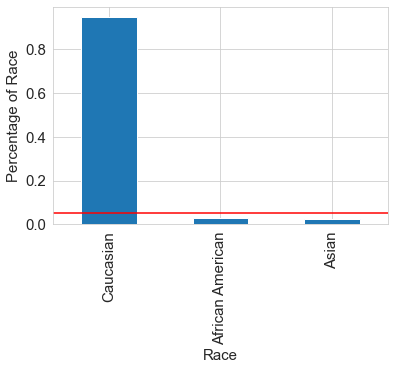

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
########################


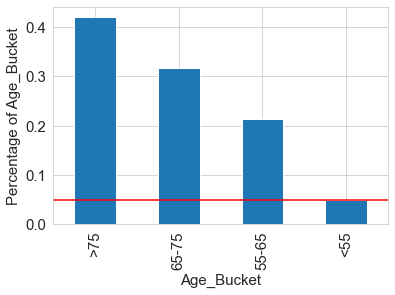

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
PULMON

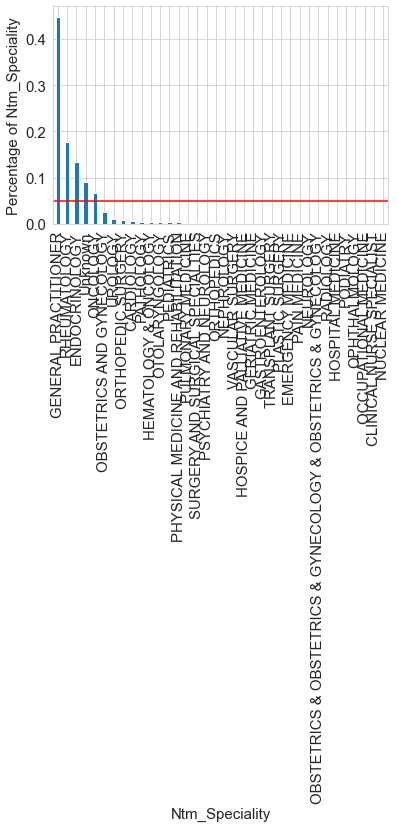

No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: Change_T_Score, dtype: int64
########################


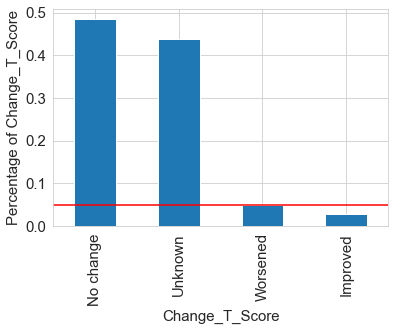

Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: Change_Risk_Segment, dtype: int64
########################


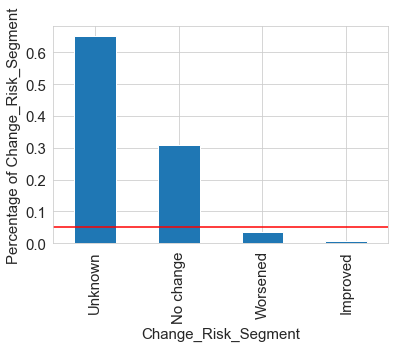

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64
########################


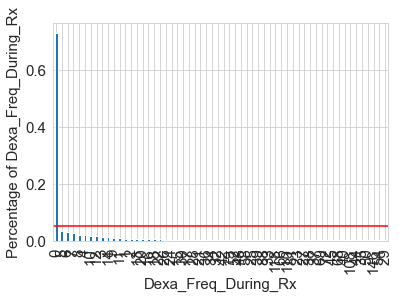

1    1242
0     970
2     781
3     317
4      91
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64
########################


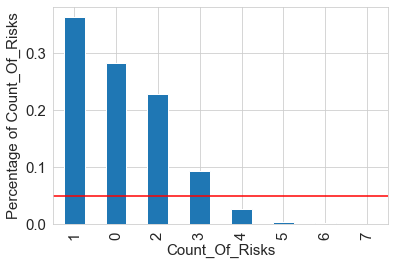

In [113]:
print("Ploting categories less than 5 percent....")
print("We will merging those categories into one...")

total_size = len(data1)
for col in list(to_combine.keys()) + list(int_cols):
    # aka percentage of each col per category

    temp_df = pd.Series(data1[col].value_counts() / total_size)

    # make plot with the above percentages
    print(data1[col].value_counts())
    print("########################")
#     print(data1[data1[col].isin(to_combine[col]['n.e'])]['Persistency_Flag'].value_counts())
#     print("########################")
#     print(data1[data1[col].isin([to_combine[col]['last_g.e']])]['Persistency_Flag'].value_counts())
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of {0}'.format(col))
    plt.show()

In [114]:
# For those 2 integer variables:
to_drop.append('Dexa_Freq_During_Rx')
to_combine['Count_Of_Risks'] = {"n.e": [4,5,6,7], 'g.e': [1,0,2,3], 'last_g.e': 3}

In [115]:
# Combine values in Race = n.e values  into a dummy value
data1['Race'] = np.where((data1['Race'].isin(to_combine['Race']['n.e'])), 'Dummy', data1['Race'])
# # Combine values in Ethnicity = n.e values  into a dummy value
# data1['Ethnicity'] = np.where((data1['Ethnicity'].isin(to_combine['Ethnicity']['n.e'])), 'Dummy', data1['Ethnicity'])
# # Drop rows with Region = n.e values
# data1 = data1[~data1['Region'].isin(to_combine['Region']['n.e'])]
# Combine values in Age_Bucket = n.e + last_g.e values  into a dummy value
age_bucket_comb = list(to_combine['Age_Bucket']['n.e']) + [to_combine['Age_Bucket']['last_g.e']]
data1['Age_Bucket'] = np.where((data1['Age_Bucket'].isin(age_bucket_comb)), '<65', data1['Age_Bucket'])
# Combine values in Ntm_Speciality = n.e values  into a dummy value
data1['Ntm_Speciality'] = np.where((data1['Ntm_Speciality'].isin(to_combine['Ntm_Speciality']['n.e'])), 'Dummy', data1['Ntm_Speciality'])
# Combine values in Change_T_Score = n.e + last_g.e values  into a dummy value
age_bucket_comb = list(to_combine['Change_T_Score']['n.e']) + [to_combine['Change_T_Score']['last_g.e']]
data1['Change_T_Score'] = np.where((data1['Change_T_Score'].isin(age_bucket_comb)), 'Dummy', data1['Change_T_Score'])
# Combine values in Change_Risk_Segment = n.e values  into a dummy value
data1['Change_Risk_Segment'] = np.where((data1['Change_Risk_Segment'].isin(to_combine['Change_Risk_Segment']['n.e'])), 'Dummy', data1['Change_Risk_Segment'])
# Split values in to two buckets, under 3 and about 4
data1['Count_Of_Risks'] = np.where((data1['Count_Of_Risks'].isin(to_combine['Count_Of_Risks']['n.e'])), '1', '0')

data1 = data1.drop(to_drop, axis=1)

Ploting categories less than 5 percent....
We will merging those categories into one...
Caucasian    3245
Dummy         179
Name: Race, dtype: int64


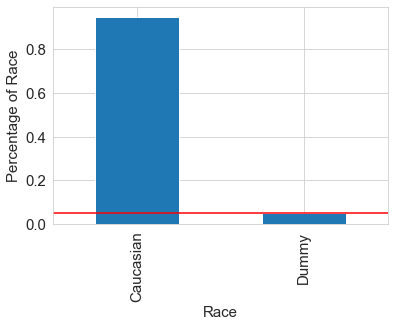

>75      1439
65-75    1086
<65       899
Name: Age_Bucket, dtype: int64


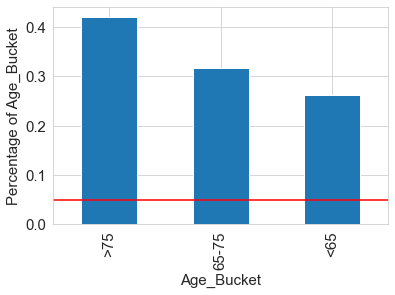

GENERAL PRACTITIONER    1535
RHEUMATOLOGY             604
ENDOCRINOLOGY            458
Unknown                  310
Dummy                    292
ONCOLOGY                 225
Name: Ntm_Speciality, dtype: int64


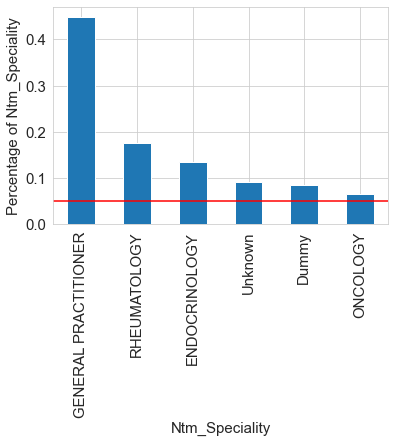

No change    1660
Unknown      1497
Dummy         267
Name: Change_T_Score, dtype: int64


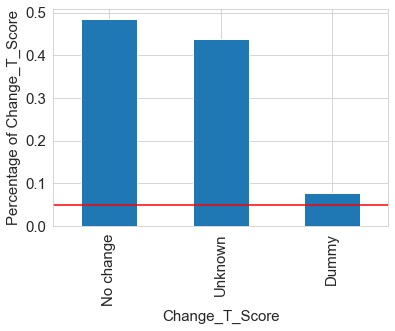

Unknown      2229
No change    1052
Dummy         143
Name: Change_Risk_Segment, dtype: int64


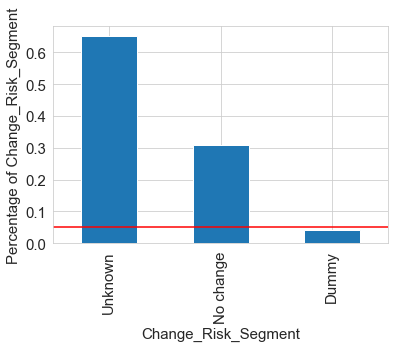

0    3310
1     114
Name: Count_Of_Risks, dtype: int64


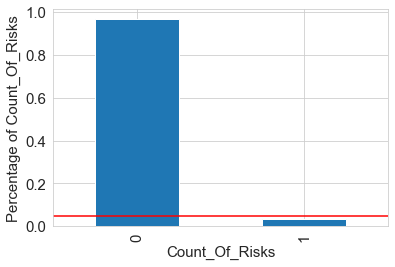

In [116]:
print("Ploting categories less than 5 percent....")
print("We will merging those categories into one...")

total_size = len(data1)
for col in list(to_combine.keys()):# + to_drop:
    # aka percentage of each col per category

    temp_df = pd.Series(data1[col].value_counts() / total_size)

    # make plot with the above percentages
    print(data1[col].value_counts())
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of {0}'.format(col))
    plt.show()

# One hot encoding....

In [117]:
cols = list(obejct_cols) + ['Count_Of_Risks']
ohe = ce.one_hot.OneHotEncoder(verbose=1, cols=cols, return_df=True, use_cat_names=True)
data2 = ohe.fit_transform(data)
data2 = data2.replace({'Persistency_Flag': {'Persistent': 1, 'Non-Persistent': 0}})


In [118]:
from sklearn.decomposition import KernelPCA #if another dimensionality reduction method proved to yield better results, replace here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 1:], data2.iloc[:, 0], test_size=0.25, random_state=48)

# kpca = KernelPCA(n_components = 12, kernel = 'linear')
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)


# explained_variance = np.var(X_train1, axis=0)
# explained_variance_ratio = explained_variance / np.sum(explained_variance)
# aaa = np.cumsum(explained_variance_ratio)
# plt.plot(np.arange(len(aaa)), aaa)
# aaa.shape

In [119]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7,max_depth=1, random_state=20).fit(X_train, y_train)
y_  = clf.predict(X_test)
print("Accuracy GradientBoostingClassifier: ", round(accuracy_score(y_test, y_),2))

clf = RandomForestClassifier(max_depth=12, random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy RandomForestClassifier: ', round(accuracy_score(y_test, y_), 2))

logreg = LogisticRegression(max_iter=10000, solver='saga')
logreg.fit(X_train,y_train)
y_ = logreg.predict(X_test)
print('Accuracy LogisticRegression: ', round(accuracy_score(y_test, y_), 2))

clf = svm.SVC(kernel='rbf', random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC RBF: ', round(accuracy_score(y_test, y_), 2))

clf = svm.SVC(kernel='linear', random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC linear: ', round(accuracy_score(y_test, y_), 2))


clf = svm.SVC(kernel='poly', random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC polynomial: ', round(accuracy_score(y_test, y_), 2))

clf = svm.SVC(kernel='sigmoid', random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC sigmoid: ', round(accuracy_score(y_test, y_), 2))



Accuracy GradientBoostingClassifier:  0.83
Accuracy RandomForestClassifier:  0.82
Accuracy LogisticRegression:  0.81
Accuracy SVC RBF:  0.8
Accuracy SVC linear:  0.8
Accuracy SVC polynomial:  0.78
Accuracy SVC sigmoid:  0.75
